In [ ]:
# Libraries

In [22]:
import os
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
from dask import bag
from dask import diagnostics
import cv2
import math
import random

## Data

In [23]:
number_classes = {
'Lote 1': len(os.listdir("Sin jaguar de noche/lote 1")),
'Lote 2': len(os.listdir("Sin jaguar de noche/lote 2")),
'Lote 3': len(os.listdir("Sin jaguar de noche/lote 3 - camara")),
'Lote 4': len(os.listdir("Sin jaguar de noche/lote 4 - camara"))
}

## Basic Exploration

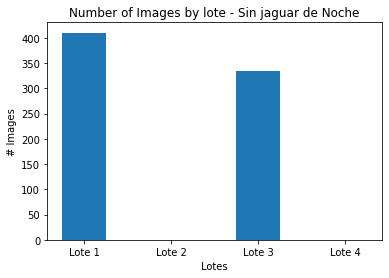

In [24]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by lote - Sin jaguar de Noche");
plt.xlabel('Lotes');
plt.ylabel('# Images');

In [25]:
directories = {
'Lote 1': 'Sin jaguar de noche/lote 1/',
'Lote 3': 'Sin jaguar de noche/lote 3 - camara/'
}

In [26]:
def get_dims(img):
    Y,X = img.shape[0], img.shape[1]
    return Y,X

In [27]:
h_list = []
w_list = []

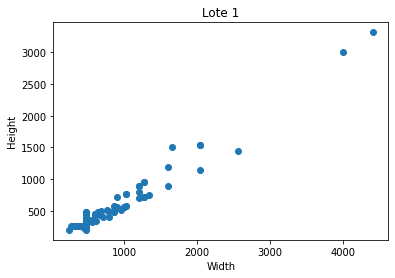

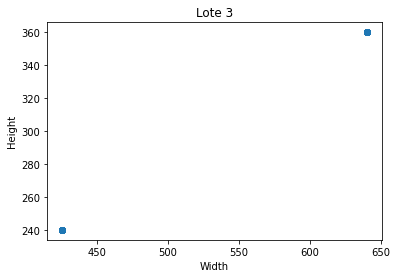

In [28]:
for key,value in directories.items():
    filepath = value
    filelist = [filepath + f for f in os.listdir(filepath)]


    for pathImage in filelist:
        img = cv2.imread(pathImage)
        if type(img) != type(None):
            y,x = get_dims(img)
            h_list.append(y)
            w_list.append(x)

    plt.scatter(w_list, h_list)

    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title(key)
    plt.show()
    h_list = []
    w_list = []

In [29]:
def aspect_ratio_histogram(folder_path, bins=None):
    aspect_ratios = []
    images_path = list(folder_path.glob("*.jpg"))
    random.shuffle(images_path)
    print(len(images_path))
    for image_path in images_path:
        image = np.asarray(cv2.imread(str(image_path)))
        assert(len(image.shape)==3) # (W, H, C)
        # aspect_ratios.append(image.shape[0] / image.shape[1])
        aspect_ratios.append(math.log10(image.shape[0] / image.shape[1]))
    aspect_ratios = np.asarray(aspect_ratios)
    n, bins, patches = plt.hist(aspect_ratios, bins=bins, log=True, alpha=0.5)
    return bins

410


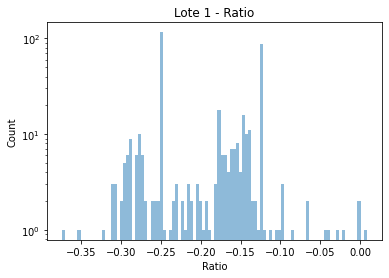

In [30]:
from pathlib import Path
lote1 = Path("Sin jaguar de noche/lote 1/")
aspect_ratio_histogram(lote1,  bins=100)
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.title('Lote 1 - Ratio')
plt.savefig('lote1_ratioH.png')

334


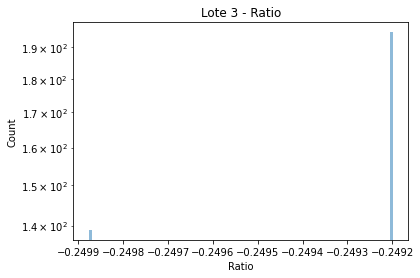

In [31]:
lote3 = Path("Sin jaguar de noche/lote 3 - camara/")
aspect_ratio_histogram(lote3,  bins=100)
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.title('Lote 3 - Ratio')
plt.savefig('lote3_ratioH.png')